# Connect fours
**Probleemstelling:** 
In Connect Four kan het erg lastig zijn voor spelers om telkens de beste zet te maken. Omdat het spel meerdere mogelijke zetten en strategische varianten heeft, zien spelers niet altijd alle kansen of dreigingen. Dit kan leiden tot fouten: spelers missen soms een winnende zet of laten de tegenstander een winnende kans liggen.

**Wat willen we oplossen?**
We willen een systeem bouwen dat automatisch de optimale zet kiest, zodat:

Het risico op fouten afneemt.
Het spel strategisch wordt benaderd, zowel om te winnen als om te voorkomen dat de tegenstander wint.


**Een rule-based systeem is geschikt omdat Connect Four duidelijke regels heeft, zoals:**

- Spelers doen om de beurt een zet.
- Een schijf valt naar de laagste vrije plek in een kolom.
- Het doel is om vier op een rij te krijgen.


**Met een rule-based systeem kun je deze regels direct programmeren zonder dat het systeem zelf hoeft te leren via data. Je maakt gewoon een set regels die het systeem volgt, zoals:**

- Blokkeer de tegenstander als die bijna wint.
- Maak een winnende zet als die mogelijk is.
- Neem het midden in beslag


#### Voordelen van een rule based system
- Eenvoudig te begrijpen: De regels van het spel zijn duidelijk en kunnen direct worden geprogrammeerd.
- Snelle implementatie: Je hoeft geen grote dataset te verzamelen en te trainen zoals bij machine learning.
- Controleerbaar gedrag: Je weet precies waarom het systeem een bepaalde beslissing neemt, omdat het regels volgt die jij zelf hebt geschreven.

Machine learning zou hier minder effectief zijn omdat:
- Je veel data nodig hebt om het model te trainen.
- Het model mogelijk willekeurige beslissingen neemt zonder dat je weet waarom.
- De beslissingen van het model minder goed uitlegbaar zijn.

## Ontwerp van regelset
De regels worden in de volgende volgorde toegepast:

- Maak een winnende zet → Dit heeft de hoogste prioriteit, want winnen is het doel.
- Blokkeer de tegenstander → Dit heeft als tweede prioriteit om verlies te voorkomen.
- Speel naar het midden → Als er geen directe winst of blokkering nodig is, probeer dan het midden te nemen
- Bouw kansen → Plaats de schijf zo dat je de kans krijgt om in de volgende beurt meerdere winnende lijnen te vormen.
- Voorkom meerdere opties voor de tegenstander → Als geen van de bovenstaande regels geldt, zorg dat de tegenstander niet te veel voordeel krijgt.

In [2]:
import os
os.chdir("..")  # dit gaat 1 map omhoog

In [3]:
!python -m unittest discover tests

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pettingzoo.classic import connect_four_v3

from src.agents import ConnectFourAgent, RandomAgent

def evaluate_agents(agent1, agent2, n_games=50):
    """
    Laat agent1 en agent2 meerdere potjes Connect Four spelen.
    Retourneert (#wins agent1, #wins agent2, #draws).
    """
    wins_agent1 = 0
    wins_agent2 = 0
    draws = 0

    for _ in range(n_games):
        env = connect_four_v3.env(render_mode=None)
        env.reset()
        
        done = False
        
        while not done:
            obs = env.observe(env.agent_selection)
            board = obs['observation'][:,:,0]
            
            current_player_id = 1 if env.agent_selection == "player_0" else 2
            
            # Kies de juiste agent
            if current_player_id == agent1.player:
                move = agent1.select_action(board)
            else:
                move = agent2.select_action(board)
            
            env.step(move)
            done = any(env.terminations.values()) or any(env.truncations.values())
        
        # Wie won?
        reward_p0 = env.rewards["player_0"]
        reward_p1 = env.rewards["player_1"]
        if reward_p0 == 1:
            winner = 1
        elif reward_p1 == 1:
            winner = 2
        else:
            winner = 0  # gelijkspel

        if winner == agent1.player:
            wins_agent1 += 1
        elif winner == agent2.player:
            wins_agent2 += 1
        else:
            draws += 1

    return wins_agent1, wins_agent2, draws

In [ ]:
# Maak de agents aan
rule_agent = ConnectFourAgent(player=1)
random_agent = RandomAgent(player=2)

# 50 potjes spelen
wins_rule, wins_random, draws = evaluate_agents(rule_agent, random_agent, n_games=50)

print(f"Resultaten over 50 potjes:")
print(f" - Rule-based agent (player=1) heeft gewonnen: {wins_rule}")
print(f" - Random agent     (player=2) heeft gewonnen: {wins_random}")
print(f" - Gelijke spelen: {draws}")

[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
Resultaten over 50 potjes:
 - Rule-based agent (player=1) heeft gewonnen: 44
 - Random agent     (player=2) heeft gewonnen: 2
 - Gelijke spelen: 4


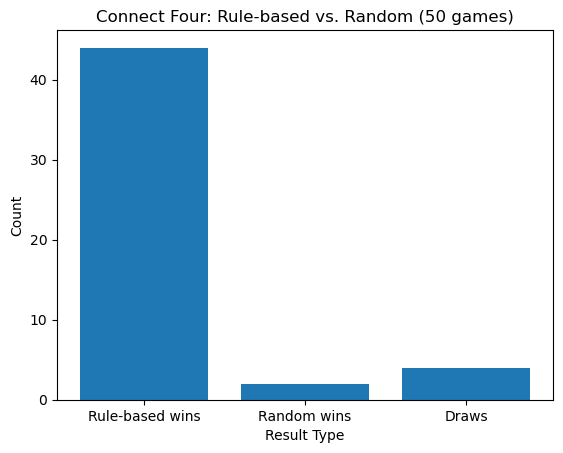

In [6]:
labels = ["Rule-based wins", "Random wins", "Draws"]
scores = [wins_rule, wins_random, draws]

plt.bar(labels, scores)
plt.title("Connect Four: Rule-based vs. Random (50 games)")
plt.xlabel("Result Type")
plt.ylabel("Count")
plt.show()

In [ ]:
!python src/main.py